<a href="https://colab.research.google.com/github/ifymifan/IOT-AI/blob/main/Lab4_2_image_classification_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import torch
from torch.utils.data import DataLoader,Dataset
import matplotlib.pyplot as plt
import torchvision

# Corrected the typo from 'CIFAF10' to 'CIFAR10'
trainig_data = torchvision.datasets.CIFAR10(root='./data',train=True,download=True)
test_data = torchvision.datasets.CIFAR10(root='./data',train=False,download=True)

100%|██████████| 170M/170M [00:02<00:00, 84.1MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


label: 9


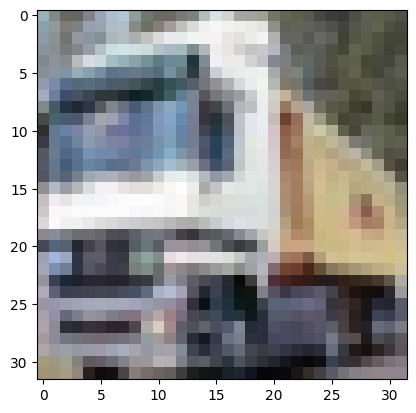

In [15]:
image,label = trainig_data[1]
plt.imshow(image)
print('label:',label)

In [16]:
from torchvision.transforms import ToTensor
trainig_data = torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=ToTensor())
test_data = torchvision.datasets.CIFAR10(root='./data',train=False,download=True,transform=ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [17]:
batch_size=64
train_dataloader = DataLoader(trainig_data,batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data,batch_size=batch_size, shuffle=True)

In [18]:
for image, label in train_dataloader:
    print(image.shape)
    print(label.shape)
    break

torch.Size([64, 3, 32, 32])
torch.Size([64])


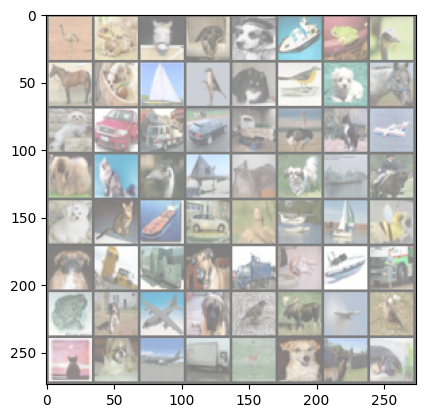

bird  frog  horse cat   dog   ship  frog  bird  horse dog   ship  bird  cat   bird  dog   horse dog   car   truck car   truck bird  cat   plane dog   cat   bird  plane cat   dog   ship  horse dog   cat   ship  car   bird  plane ship  dog   dog   truck truck dog   truck cat   ship  truck frog  dog   plane dog   bird  deer  plane bird  cat   dog   plane truck deer  dog   deer  dog  


In [19]:
import matplotlib.pyplot as plt
import numpy as np
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()
dataiter = iter(train_dataloader)
import matplotlib.pyplot as plt
import numpy as np
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()
dataiter = iter(train_dataloader)
images,labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
# Define classes for CIFAR-10
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))


In [20]:
import torch # Import the torch module

device="cuda" if torch.cuda.is_available() else "cpu" # Corrected typo from torch.cuba to torch.cuda
print(f"Using {device} device")

Using cpu device


In [21]:
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 19.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [22]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.conv1=nn.Conv2d(3,6,5)
    self.pool=nn.MaxPool2d(2,2)
    self.conv2=nn.Conv2d(6,16,5)
    self.fc1=nn.Linear(16*5*5,120)
    self.fc2=nn.Linear(120,84)
    self.fc3=nn.Linear(84,10)
  def forward(self,x):
    x=self.pool(F.relu(self.conv1(x)))
    x=self.pool(F.relu(self.conv2(x)))
    x=torch.flatten(x,1)
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.fc3(x)
    return x
net=Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [23]:
import torch.optim as optim

In [24]:
import torch.optim as optim
import torch.nn as nn
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(net.parameters(),lr=0.001,momentum=0.9)

In [25]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader,Dataset
import torchvision
from torchvision.transforms import ToTensor

# Define the training dataset and dataloader
trainig_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=ToTensor())
batch_size = 64  # Define your batch size
train_dataloader = DataLoader(trainig_data, batch_size=batch_size, shuffle=True)

# ... (rest of your code) ...

for epoch in range(20):
  running_loss=0.0
  for i, data in enumerate(train_dataloader,0):  # Now train_dataloader is defined
    inputs,labels=data
    outputs=net(inputs)
    loss=criterion(outputs,labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss+=loss.item()
print(f"epoch:{epoch}",f"number of images:{i}",running_loss)
print("Finished Training")

Files already downloaded and verified
epoch:19 number of images:781 927.5856053233147
Finished Training


In [26]:
correct =0
total=0
with torch.no_grad():
  for data in test_dataloader:
    images,labels=data
    outputs=net(images)
    _, predicted=torch.max(outputs.data,1)
    total+=labels.size(0)
    correct+=(predicted==labels).sum().item()

print(f"Accuracy of the network on the 10000 test images: {100*correct/total}%")

Accuracy of the network on the 10000 test images: 55.86%


In [28]:
torch.save(net.state_dict(),'net.pth')
print("saved pytorch model state to model.path")

saved pytorch model state to model.path
